In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import os

In [3]:
Fs = 44100.0

tlen = 1
Ts = 1 / Fs
t = np.arange(0, tlen, Ts)

In [4]:
sin_freq = 440
src = 2 * np.pi * sin_freq * t

signal = np.sin(src)

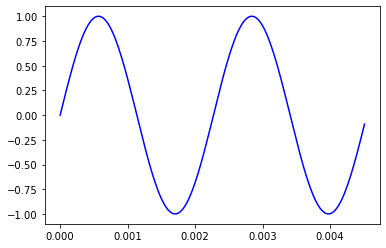

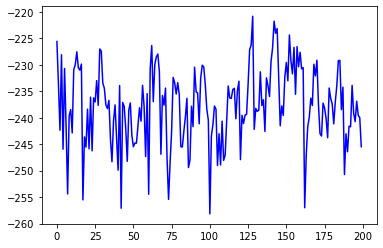

In [5]:
x_range = 200
plt.plot(t[0:x_range], signal[0:x_range], color = 'blue')
plt.show()

freq = np.fft.fftfreq(len(t), Ts)
signal_f = np.fft.fft(signal)

plt.plot(freq[0:x_range], 20 * np.log10(np.abs(signal_f[0:x_range])), color = 'blue')

plt.show()

In [6]:
scaled = np.int16(signal/np.max(np.abs(signal)) * 32767)
write('snd_signal.wav', 44100, scaled)

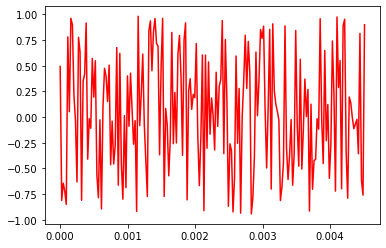

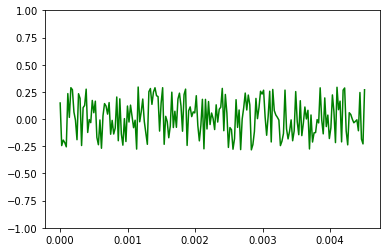

In [7]:
noise = np.random.uniform(-1, 1, len(t))
scaled_noise = noise * 0.3
plt.plot(t[0:x_range], noise[0:x_range], color = 'red')
plt.show()

plt.plot(t[0:x_range], scaled_noise[0:x_range], color = 'green')
plt.ylim(-1, 1)
plt.show()

scaled = np.int16(noise/np.max(np.abs(noise)) * 32767)
write('noise_signal.wav', 44100, scaled)

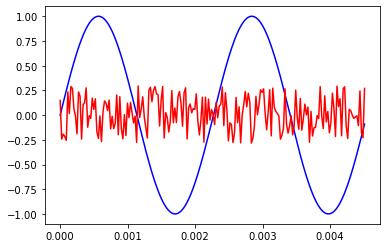

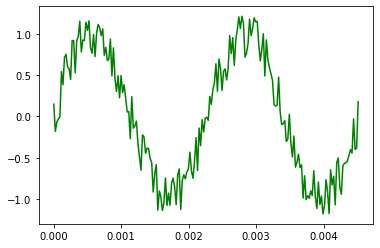

In [8]:
signal_n = signal + noise
scaled_noise = 0.3 * noise
signal_n = signal + scaled_noise
scaled = np.int16(signal_n / np.max(np.abs(signal_n)) * 32767)
write('snd_noise.wav', 44100, scaled)
plt.plot(t[0:x_range], signal[0:x_range], color='blue')
plt.plot(t[0:x_range], scaled_noise[0:x_range], color='red')
plt.show()
plt.plot(t[0:x_range], signal_n[0:x_range], color='green')
plt.show()

In [10]:
import os
os.system('start snd_signal.wav')
os.system('start noise_signal.wav')
os.system('start snd_noise.wav')

32512